# pandas

In [2]:
import numpy as np
import pandas as pd

# 시리즈
- 시리즈 = value + index

### 시리즈 생성

In [3]:
s = pd.Series([9904312, 3448737, 2890451, 2466052],
              index=["서울", "부산", "인천", "대구"])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [4]:
pd.Series(range(10, 14))

0    10
1    11
2    12
3    13
dtype: int64

In [5]:
# name 을 이용하여 데이터와 인덱스에도 이름을 부여할 수 있음
s.name = '인구'
s.index.name = '도시'

In [6]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

### 시리즈 연산

In [7]:
s / 1000

도시
서울    9904.312
부산    3448.737
인천    2890.451
대구    2466.052
Name: 인구, dtype: float64

### 시리즈 인덱싱

In [8]:
s[2], s['인천']

(2890451, 2890451)

In [9]:
s[(250e4 < s) & (s<500e4)]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

### 시리즈 슬라이싱

In [10]:
s[1:3]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [11]:
s0 = pd.Series(range(3), index=["a", "b", "c"])
s0

a    0
b    1
c    2
dtype: int64

In [12]:
# 인덱스가 영문일 경우
s0.a

0

### 시리즈와 딕셔너리 자료형

In [13]:
'서울' in s

True

In [14]:
for k,v in s.items():
    print('%s=%d' %(k,v))

서울=9904312
부산=3448737
인천=2890451
대구=2466052


In [15]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158})
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [16]:
# 순서를 정하기 위해 인덱스를 리스트로 저장(딕셔너리는 순서가 없음)
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158},
               index=["부산", "서울", "인천", "대전"])
s2

부산    3393191
서울    9631482
인천    2632035
대전    1490158
dtype: int64

### 인덱스 기반 연산

In [17]:
# s = 2015년 자료, s2 = 2010년 자료
ds = s-s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [18]:
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

In [19]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [20]:
# 인구 증가율 구하기
rs = ds / s2*100
rs = rs[rs.notnull()]
rs

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

### 데이터의 갱신, 추가 ,삭제

In [21]:
rs['부산'] = 1.62
rs

부산    1.620000
서울    2.832690
인천    9.818107
dtype: float64

In [22]:
rs['대구'] = 1.41


In [23]:
del rs['서울']
rs

부산    1.620000
인천    9.818107
대구    1.410000
dtype: float64

## 데이터 프레임

### 데이터 프레임 생성
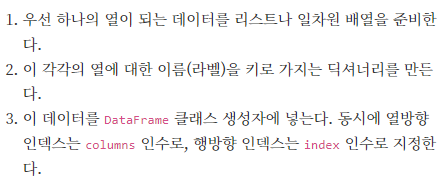

In [24]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [25]:
# 데이터 접근법
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [26]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [27]:
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


### 열 데이터의 갱신, 추가, 삭제

In [28]:
# "2010-2015 증가율"이라는 이름의 열 추가
df["2010-2015 증가율"] = df["2010-2015 증가율"] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [29]:
# "2005-2010 증가율"이라는 이름의 열 추가
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [30]:
# "2010-2015 증가율"이라는 이름의 열 삭제
del df["2010-2015 증가율"]
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


### 열 인덱싱

In [31]:
# 시리즈로 반환
df['지역']

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [32]:
df[['지역', '2010']]

특성,지역,2010
도시,,
서울,수도권,9631482
부산,경상권,3393191
인천,수도권,2632035
대구,경상권,2431774


In [33]:
# 데이터프레임 자료형으로 유지
df[['2010']]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


### 행 인덱싱

In [34]:
df["서울":"부산"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40


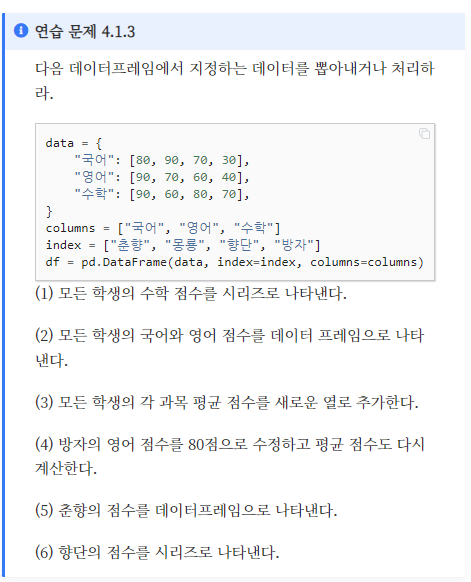

In [35]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

In [36]:
df

,국어,영어,수학
춘향,80,90,90
몽룡,90,70,60
향단,70,60,80
방자,30,40,70


In [37]:
df['수학']

춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

In [38]:
df[['국어','영어']]

,국어,영어
춘향,80,90
몽룡,90,70
향단,70,60
방자,30,40


In [39]:
df['평균'] = (df['국어'] + df['영어'] + df['수학'])/3

In [40]:
df

,국어,영어,수학,평균
춘향,80,90,90,86.666667
몽룡,90,70,60,73.333333
향단,70,60,80,70.000000
방자,30,40,70,46.666667


In [41]:
df['영어']['방자'] = 80

C:\Users\alsgu\AppData\Local\Temp/ipykernel_10876/2886495334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['영어']['방자'] = 80


In [42]:
df['평균'] = (df['국어'] + df['영어'] + df['수학'])/3
df

,국어,영어,수학,평균
춘향,80,90,90,86.666667
몽룡,90,70,60,73.333333
향단,70,60,80,70.000000
방자,30,80,70,60.000000


# 데이터 입출력

### %writefile 명령

In [43]:
%%writefile sample1.csv
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting sample1.csv


In [44]:
pd.read_csv('sample1.csv')

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [45]:
pd.read_csv('sample1.csv', index_col='c1')

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


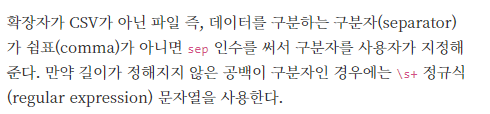

In [46]:
%%writefile sample3.txt
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Overwriting sample3.txt


In [47]:
pd.read_table('sample3.txt', sep='\s+')

,c1,c2,c3,c4
0,0.179181,-1.538472,1.347553,0.43381
1,1.024209,0.087307,-1.281997,0.49265
2,0.417899,-2.002308,0.255245,-1.10515


## csv 파일 출력

In [48]:
df.to_csv('sample6.csv')

## 인터넷 상의 csv 파일 입력

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 데이터 프레임 고급 인덱싱

## loc 인덱서

In [51]:
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4),
                  index=["a", "b", "c"],
                  columns=["A", "B", "C", "D"])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [52]:
# a 행 출력
df.loc['a']

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [53]:
# 슬라이싱
df.loc['b':'c'] # loc 사용안해도 상관없음

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [54]:
df.loc[["b", "c"]] # 여기서는 loc 사용안하면 오류

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [55]:
df.A > 15

a    False
b    False
c     True
Name: A, dtype: bool

In [56]:
df.loc[df.A > 15]

,A,B,C,D
c,18,19,20,21


In [57]:
df2 = pd.DataFrame(np.arange(10, 26).reshape(4, 4), columns=["A", "B", "C", "D"])
df2

,A,B,C,D
0,10,11,12,13
1,14,15,16,17
2,18,19,20,21
3,22,23,24,25


In [58]:
df2.loc[1:2]

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


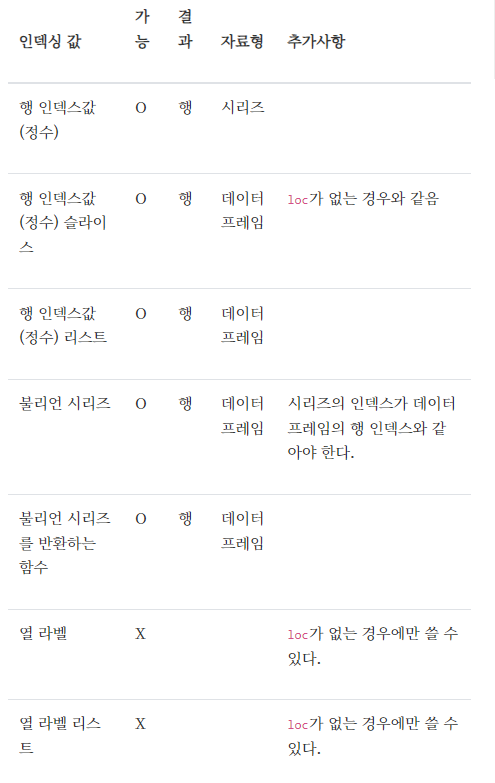

### 인덱싱값을 행과 열 모두

In [59]:
df.loc['a','A']

10

In [60]:
df.loc['b':,'A']

b    14
c    18
Name: A, dtype: int32

In [61]:
df.loc[["a", "b"], ["B", "D"]]

,B,D
a,11,13
b,15,17


## iloc 인덱서
- iloc는 정수만 받음

In [62]:
df.iloc[0,1]

11

In [63]:
df.iloc[0,-2:]

C    12
D    13
Name: a, dtype: int32

In [64]:
df.iloc[2:3,1:3]

,B,C
c,19,20


In [65]:
# 인덱스만 들어가면 행 출력
df.iloc[1]

A    14
B    15
C    16
D    17
Name: b, dtype: int32

# 데이터 프레임의 데이터 조작

## 데이터 갯수 세기

In [66]:
s = pd.Series(range(10))
s[3] = np.nan
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [67]:
s.count()

9

In [68]:
np.random.seed(2)
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df.iloc[2, 3] = np.nan
df

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [69]:
df.count()

0    4
1    4
2    4
3    3
dtype: int64

In [70]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [71]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

## 카테고리 값 세기

In [72]:
np.random.seed(1)
s2 = pd.Series(np.random.randint(6, size=100))
s2.tail()

95    4
96    5
97    2
98    4
99    3
dtype: int32

In [73]:
s2.value_counts()

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

In [74]:
df[0].value_counts()

3.0    2
0.0    1
4.0    1
Name: 0, dtype: int64

In [75]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

## 정렬

In [76]:
# 인덱스에 따라 정렬
s2.value_counts().sort_index() # nan이 있으면 가장 마지막으로

0    18
1    22
2    13
3    14
4    17
5    16
dtype: int64

In [77]:
# 반대로 정렬
s.sort_values(ascending=False)

9    9.0
8    8.0
7    7.0
6    6.0
5    5.0
4    4.0
2    2.0
1    1.0
0    0.0
3    NaN
dtype: float64

In [78]:
# value값으로 정렬시 기준이 되는 열을 by로 정해야함
df.sort_values(by=1)

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [79]:
# 동일값이면 다음열로 순서를 따짐
df.sort_values(by=[1, 2])

,0,1,2,3
1,3.0,0.0,2.0,1.0
0,0.0,0.0,3.0,2.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


## 행/ 열 합계

In [80]:
np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


In [81]:
df2.sum(axis=1)

0    35
1    34
2    41
3    42
dtype: int64

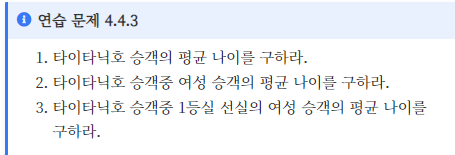

In [82]:
titanic['age'].sum(axis=0) / len(titanic)

23.79929292929293

## apply 변환

In [83]:
df3 = pd.DataFrame({
    'A': [1, 3, 4, 3, 4],
    'B': [2, 3, 1, 2, 3],
    'C': [1, 5, 2, 4, 4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [84]:
# 각 열의 최대 최소 구하기
df3.apply(lambda x: x.max() - x.min(), axis=1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [85]:
# 행에 적용
df3.apply(lambda x: x.max() - x.min(), axis=1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [86]:
titanic["adult/child"] = titanic.apply(lambda r: "adult" if r.age >= 20 else "child", axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult


## 실수 값을 카테고리 값으로 변환

In [87]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]


In [88]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '장년', '미성년자', '중년', '중년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [89]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [90]:
cats.categories

Index(['미성년자', '청년', '중년', '장년', '노년'], dtype='object')

In [91]:
df4 = pd.DataFrame(ages, columns=["ages"])
df4["age_cat"] = pd.cut(df4.ages, bins, labels=labels)
df4

,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,중년
6,31,중년
7,61,장년
8,20,미성년자
9,41,중년


In [92]:
# age_cut은 문자열이 아니기 때문에 변환
df4.age_cat.astype(str) + df4.ages.astype(str)

0       nan0
1      미성년자2
2     미성년자10
3       청년21
4       청년23
5       중년37
6       중년31
7       장년61
8     미성년자20
9       중년41
10      중년32
11    nan101
dtype: object

In [93]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4, labels=["Q1", "Q2", "Q3", "Q4"])
cats

['Q2', 'Q1', 'Q2', 'Q3', 'Q1', ..., 'Q1', 'Q1', 'Q4', 'Q4', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [94]:
pd.value_counts(cats)

Q1    250
Q2    250
Q3    250
Q4    250
dtype: int64

# 데이터 프레임 인덱스 조작

## 데이터프레임 인덱스 설정 및 제거
- set_index : 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 설정
- reset_index : 기존의 행 인덱스 제거 -> 인덱스를 데이터 열로 추가

In [95]:
np.random.seed(0)
df1 = pd.DataFrame(np.vstack([list('ABCDE'),
                              np.round(np.random.rand(3, 5), 2)]).T,
                   columns=["C1", "C2", "C3", "C4"])
df1

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [96]:
df2 = df1.set_index("C1")
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [97]:
df2.set_index("C2")

,C3,C4
C2,,
0.55,0.65,0.79
0.72,0.44,0.53
0.6,0.89,0.57
0.54,0.96,0.93
0.42,0.38,0.07


In [98]:
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [99]:
df2.reset_index()

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [100]:
# 인덱스 열을 그냥 삭제
df2.reset_index(drop=True)

,C2,C3,C4
0,0.55,0.65,0.79
1,0.72,0.44,0.53
2,0.6,0.89,0.57
3,0.54,0.96,0.93
4,0.42,0.38,0.07


## 다중 인덱스

In [101]:
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C1", "C2", "C1", "C2"]])
df3

A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

In [102]:
df3.columns.names = ["Cidx1", "Cidx2"]
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [103]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C", "D", "C", "D"]],
                   index=[["M", "M", "M", "F", "F", "F"],
                          ["id_" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"]
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

## 행 인덱스와 열 인덱스 교환
- stack : 열 인덱스 -> 행 인덱스
- unstack : 행 인덱스 -> 열 인덱스

In [104]:
df4.stack("Cidx1")

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

In [105]:
df4.unstack("Ridx2")

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

In [106]:
df4.unstack(0)

Cidx1     A                       B                  
Cidx2     C           D           C           D      
Ridx1     F     M     F     M     F     M     F     M
Ridx2                                                
id_1   0.76  1.76  0.12  0.40  0.44  0.98  0.33  2.24
id_2   1.49  1.87 -0.21 -0.98  0.31  0.95 -0.85 -0.15
id_3  -2.55 -0.10  0.65  0.41  0.86  0.14 -0.74  1.45

## 다중 인덱스가 있는 경우

In [107]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [108]:
df3['B']

Cidx2,C1,C2
0,0.98,2.24
1,0.95,-0.15
2,0.14,1.45
3,0.44,0.33
4,0.31,-0.85


In [109]:
df3[('B','C1')]

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64

In [110]:
df3.loc[0, ("B", "C1")]

0.98

In [111]:
df3.loc[0, ("B", "C1")] = 100
df3

Cidx1     A             B      
Cidx2    C1    C2      C1    C2
0      1.76  0.40  100.00  2.24
1      1.87 -0.98    0.95 -0.15
2     -0.10  0.41    0.14  1.45
3      0.76  0.12    0.44  0.33
4      1.49 -0.21    0.31 -0.85

In [112]:
df3.iloc[0, 2]

100.0

In [113]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [114]:
df4.loc[('M','id_1'),('A','C')]

1.76

In [115]:
df4.loc[:, ("A", "C")]

Ridx1  Ridx2
M      id_1     1.76
       id_2     1.87
       id_3    -0.10
F      id_1     0.76
       id_2     1.49
       id_3    -2.55
Name: (A, C), dtype: float64

In [116]:
df4.loc[("M", "id_1"), :]

Cidx1  Cidx2
A      C        1.76
       D        0.40
B      C        0.98
       D        2.24
Name: (M, id_1), dtype: float64

In [117]:
# : 대신 slice(None)를 사용해야 함
df4.loc[("M", slice(None)), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45

In [118]:
df4.loc[(slice(None), "id_1"), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
F     id_1   0.76  0.12  0.44  0.33

## 다중 인덱스의 인덱스 순서 교환
- swaplevel(i, j, axis)

In [119]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [120]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [121]:
# inner join은 같은 키값을 가지는 것만 병합
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [122]:
# outerjoin은 같은 키 값이 없어도 병합
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [123]:
# 첫번째 데이터 프레임의 키값만 전부 보여줌
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [124]:
# 두번째 데이터의 키값만 전부 보여줌
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [125]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [126]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [127]:
# 위의 경우에는 품종이 키값인데 값이 데이터가 여러개 존재
pd.merge(df1, df2)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


In [128]:
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [129]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [132]:
# on 파라메타로 기준열 선정, 기준열이 아닌데 이름이 같은 경우 _x, _y 등이 붙음.
pd.merge(df1, df2, on='고객명')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


In [133]:
# 기준열의 이름이 다르면 left_on, right_on을 사용하여 명시
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3


In [134]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [135]:
pd.merge(df1, df2, left_on='이름', right_on="성명")

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


In [136]:
# 기준열이 아닌 인덱스 기준열로 사용하기 위해서는 left_index, right_index를 True로 설정
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [137]:
df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [138]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [139]:
df1 = pd.DataFrame(
    [[1., 2.], [3., 4.], [5., 6.]],
    index=['a', 'c', 'e'],
    columns=['서울', '부산'])
df1

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [140]:
df2 = pd.DataFrame(
    [[7., 8.], [9., 10.], [11., 12.], [13, 14]],
    index=['b', 'c', 'd', 'e'],
    columns=['대구', '광주'])
df2

,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [141]:
pd.merge(df1, df2, how='outer', left_index=True, right_index=True)

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


# 피봇 테이블과 그룹분석

## 피봇 테이블

In [142]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [143]:
# 행 인덱스 도시, 열 인덱스 연도, 데이터 인구
df1.pivot('도시','연도','인구')

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [144]:
# set_index 와 unstack 을 사용함
df1.set_index(['도시','연도'])[['인구']].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

In [145]:
df1.pivot(["지역", "도시"], "연도", "인구")

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

- 행 인덱스와 열 인덱스는 키값이기 때문에 단 하나의 데이터만 가져야 한다

## 그룹분석

### groupby 메서드

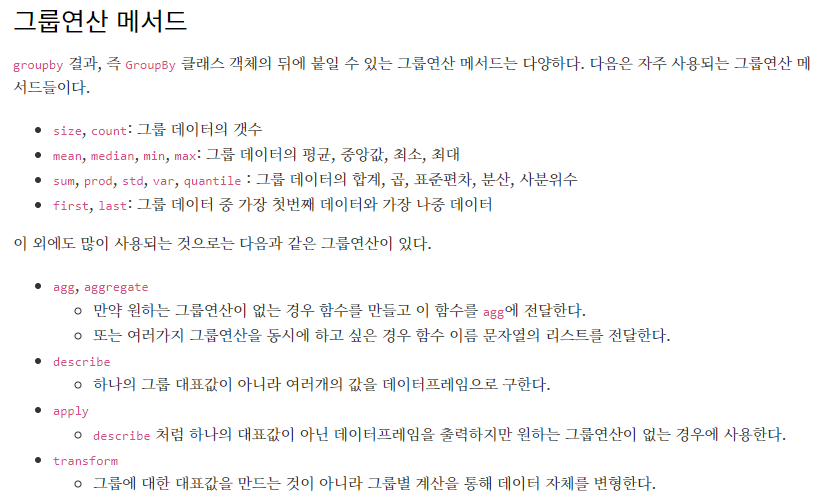

In [146]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [147]:
groups = df2.groupby(df2.key1)

In [149]:
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

In [150]:
df2.data1.groupby(df2.key1).sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [152]:
 # `GroupBy` 클래스 객체에서 data1만 선택하여 분석하는 경우
df2.groupby(df2.key1)["data1"].sum()  

key1
A    8
B    7
Name: data1, dtype: int64

In [153]:
# 전체 데이터를 분석한 후 data1만 선택한 경우
df2.groupby(df2.key1).sum()["data1"]  

key1
A    8
B    7
Name: data1, dtype: int64

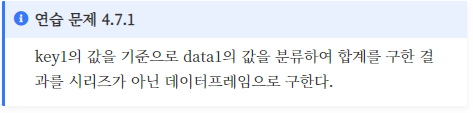

In [155]:
df2.groupby(df2.key1)[['data1']].sum()

,data1
key1,
A,8
B,7


In [158]:
# 복합키를 가지고 있는 경우
df2.data1.groupby([df2.key1, df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [159]:
df1["인구"].groupby([df1["지역"], df1["연도"]]).sum().unstack("연도")

연도,2005,2010,2015
지역,,,
경상권,3512547,3393191,3448737
수도권,9762546,9894685,12794763


In [160]:
iris = sns.load_dataset('iris')

In [161]:
# 종별로 큰값과 작은 값의 비율 구하기
def peak_to_peak_ratio(x):
    return x.max() / x.min()

iris.groupby(iris.species).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [162]:
iris.groupby(iris.species).describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [163]:
def top3_petal_length(df):
    return df.sort_values(by="petal_length", ascending=False)[:3]

iris.groupby(iris.species).apply(top3_petal_length)

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     24            4.8          3.4           1.9          0.2   
           44            5.1          3.8           1.9          0.4   
           23            5.1          3.3           1.7          0.5   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           72            6.3          2.5           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     24       setosa  
           44       setosa  
           23       setosa  
versicolor 83   versicolor  
           77   versicolor  
           72   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

In [164]:
# transform메서드는 그룹별 계산을 통해 덷이터 프레임을 변화시킨다
def q3cut(s):
    return pd.qcut(s, 3, labels=["소", "중", "대"]).astype(str)


iris["petal_length_class"] = iris.groupby(iris.species).petal_length.transform(q3cut)
iris[["petal_length", "petal_length_class"]].tail(10)

,petal_length,petal_length_class
140,5.6,중
141,5.1,소
142,5.1,소
143,5.9,대
144,5.7,중
145,5.2,소
146,5.0,소
147,5.2,소
148,5.4,중
149,5.1,소


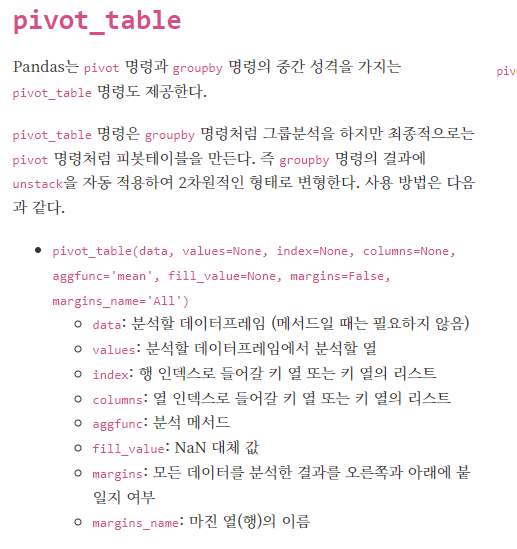

In [165]:
# pivot과는 다르게 데이터 값이 가자 앞으로 온다
df1.pivot_table("인구", "도시", "연도")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [166]:
# margins=True를 통해 합계를 추출
df1.pivot_table("인구", "도시", "연도", margins=True, margins_name="합계")

연도,2005,2010,2015,합계
도시,,,,
부산,3512547.0,3393191.0,3448737.0,3.451492e+06
서울,9762546.0,9631482.0,9904312.0,9.766113e+06
인천,NaN,263203.0,2890451.0,1.576827e+06
합계,6637546.5,4429292.0,5414500.0,5.350809e+06


In [167]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [169]:
# 식사 비용 대비 팁의 비율 구하기
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


In [170]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [171]:
tips.groupby("sex").count()

,total_bill,tip,smoker,day,time,size,tip_pct
sex,,,,,,,
Male,157,157,157,157,157,157,157
Female,87,87,87,87,87,87,87


In [172]:
tips.groupby("sex").size()

sex
Male      157
Female     87
dtype: int64

In [173]:
tips.groupby(["sex", "smoker"]).size()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

In [175]:
# 위의 값을 피봇테이블로 변경
tips.pivot_table("tip_pct", "sex", "smoker", aggfunc="count", margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [176]:
# 가장 많은 팁과 적은 팁의 차이
def peak_to_peak(x):
    return x.max() - x.min()


tips.groupby(["sex", "smoker"])[["tip"]].agg(peak_to_peak)

tip
sex    smoker      
Male   Yes     9.00
       No      7.75
Female Yes     5.50
       No      4.20

In [177]:
tips.groupby(["sex", "smoker"]).agg(["mean", peak_to_peak])[["total_bill"]]

total_bill             
                    mean peak_to_peak
sex    smoker                        
Male   Yes     22.284500        43.56
       No      19.791237        40.82
Female Yes     17.977879        41.23
       No      18.105185        28.58